> ## Workflow
1. Data collection and loading
2. Data cleaning
3. EDA
4. Feature Engineering
5. Feature Selection
6. Splitting Data
7. Data Preprocessing
8. Model Selection and Training
9. Model Evaluation
10. Hyperparameter Tuning
11. Model Validation
12. Model Deployment
13. Conclusion and Reporting

In [179]:
#import dependencies

# Data analysis tools
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from pandas.plotting import scatter_matrix 

# Training machine learning models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [4]:
#import and Load data
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sub_df = pd.read_csv('data/gender_submission.csv') # what a submission should look like
combine_df = [df, test_df]

print("Train data shape: ", df.shape)
print("Test data shape: ", test_df.shape)
print("Submission data shape: ", sub_df.shape)

Train data shape:  (891, 12)
Test data shape:  (418, 11)
Submission data shape:  (418, 2)


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S


In [50]:
df_columns = df.columns
df_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Data cleaning - duplicate data

print('shape before removing duplicates:', df.shape)

# remove duplicate data if any
duplicate_rows= df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape[0])
df = df.drop_duplicates()

print('shape after removing duplicates:', df.shape)

shape before removing duplicates: (891, 12)
number of duplicate rows:  0
shape after removing duplicates: (891, 12)


In [15]:
# Data cleaning - missing data
# handling missing data is a critical step in data cleaning because missing values can bias your results, distort statistical inferences, or cause errors in interpreting results from the analysis or machine learning
# sum of missing values in each column in a descending order

df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: >

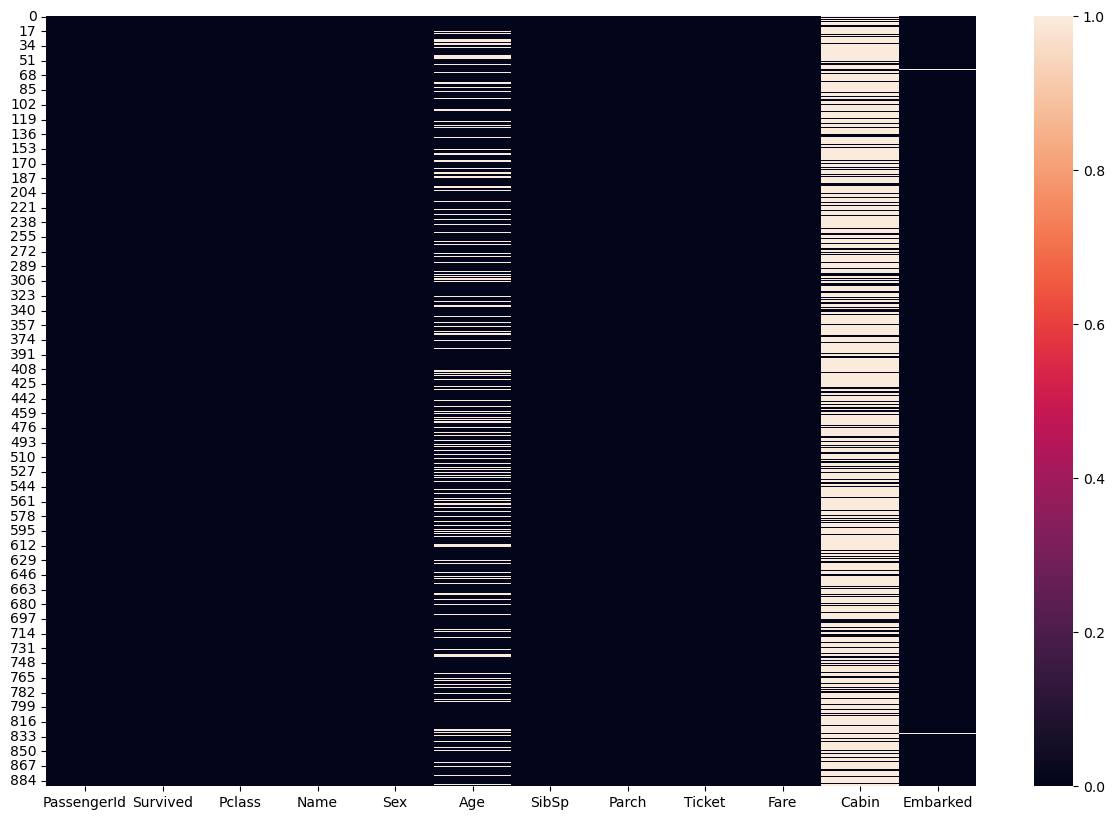

In [16]:
#Missing data visualization
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=True)

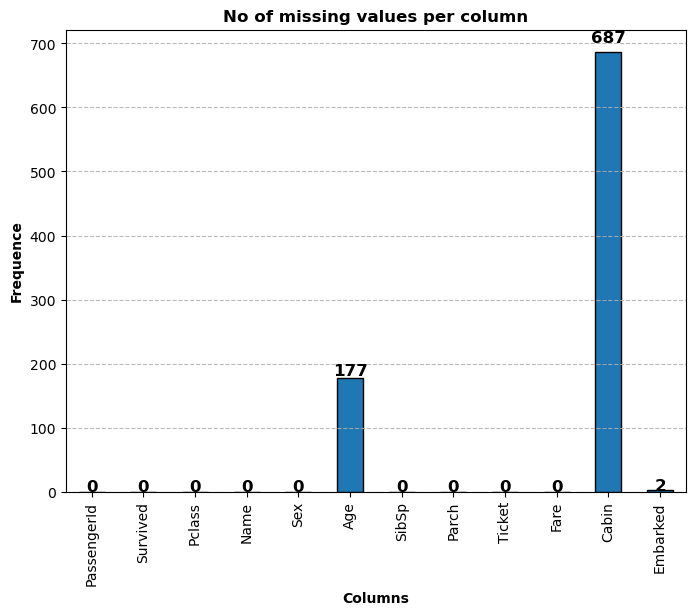

In [17]:
ax = df.isnull().sum().plot(kind="bar",  edgecolor='black', figsize=(8,6))
plt.title("No of missing values per column", fontweight='bold')
plt.xlabel("Columns", fontweight='bold')
plt.ylabel('Frequence', fontweight='bold')
# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=.85)
#Annotate the exact values on top of each bar with space (2.2% of bar height)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p. get_width() /2., p.get_height() + p.get_height() * 0.022), va='baseline', ha='center', fontweight='bold', fontsize=12, color='black')
plt.show()

> ##  EDA

 - Basic passenger demographics
 - Get a sense of passengers affluence, from where they came on board
 - Who was alone and who was with family
 - What factors helped someone survive sinking 


In [51]:
df_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Target Feature: Survived

Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This is the variable we want our machine learning model to predict based off all the others.

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived'>

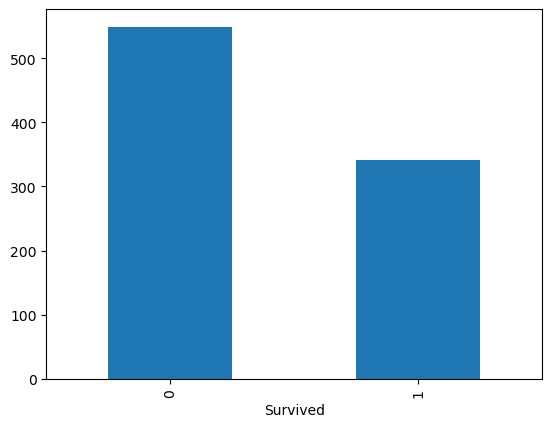

In [18]:
#Survival distribution
print(df.Survived.value_counts())
df.Survived.value_counts().plot(kind="bar")


### Feature: PassengerId

Description: The Id of the passenger.


In [55]:
# How many unique PassengerId values are there?
print("There are {} unique PassengerId values.".format(len(df.PassengerId.unique())))

There are 889 unique PassengerId values.


### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Pclass'>

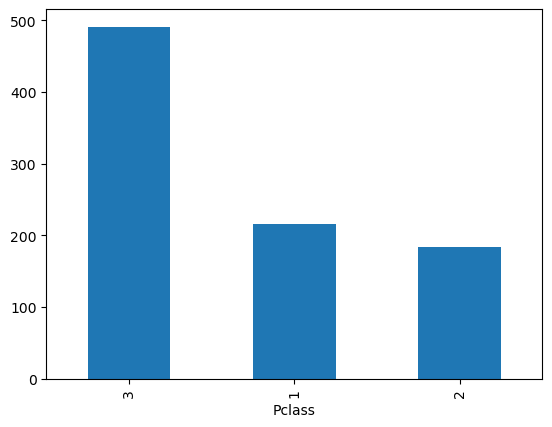

In [19]:
# Passenger Ticket class distribution  ---> pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd
print(df.Pclass.value_counts())
df.Pclass.value_counts().plot(kind='bar')

Text(0, 0.5, 'Survival Rate')

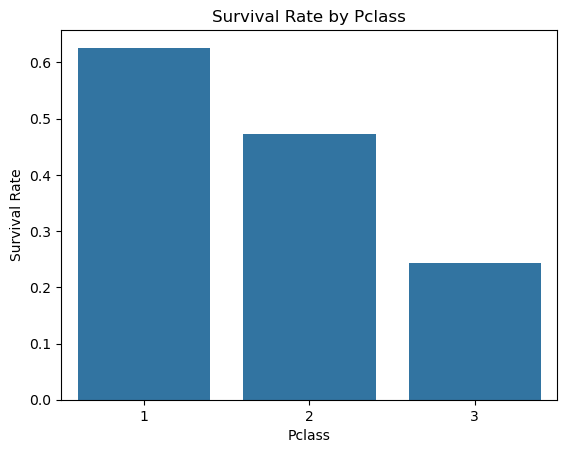

In [56]:
#survival rate by passenger class
pclass_survival = df.groupby('Pclass')['Survived'].mean()

#plot
sns.barplot(x=pclass_survival.index, y=pclass_survival.values)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')

### Feature: Sex

Description: The sex of the passenger (male or female)

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex'>

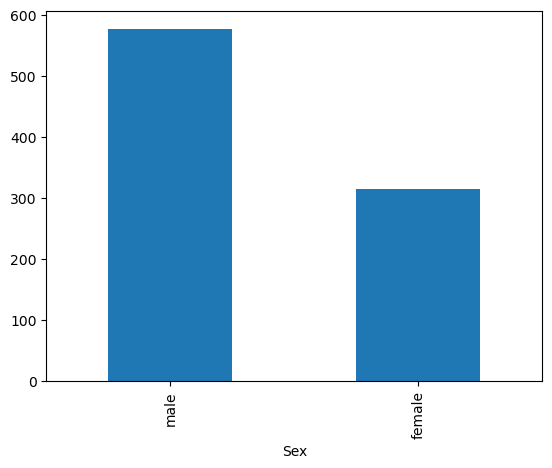

In [20]:
# Gender distribution
print(df.Sex.value_counts())
df.Sex.value_counts().plot(kind='bar')

Text(0, 0.5, 'Survival Rate')

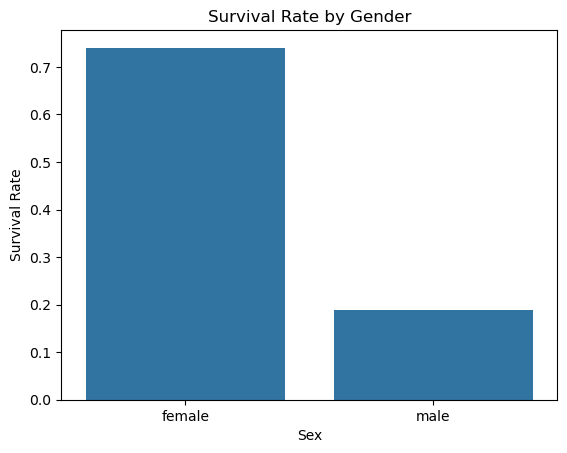

In [57]:
#survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean()

#plot
sns.barplot(x=gender_survival.index, y=gender_survival.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')

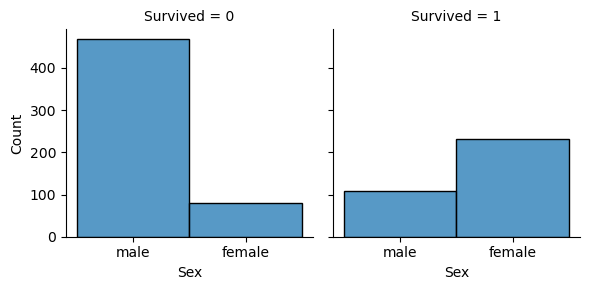

In [58]:
Sexwise = sns.FacetGrid(df, col='Survived')
Sexwise.map(sns.histplot, 'Sex')

### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Embarked'>

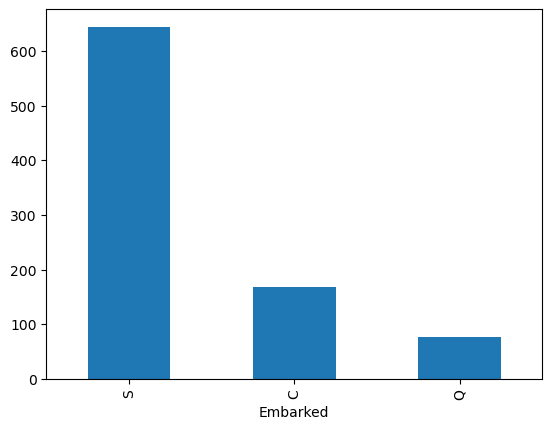

In [40]:
# Port of Embarkation Distribution ---> C = Cherbourg, Q = Queenstown, S = Southampton
print(df.Embarked.value_counts())
df.Embarked.value_counts().plot(kind='bar')


In [45]:

# How many missing values does Embarked have?
print('There are {} missing values '.format(df.Embarked.isnull().sum()))


There are 2 missing values 


In [46]:
# Cleaning and Removing the two missing values from Embarked
print(df.shape[0])
df = df.dropna(subset=['Embarked'])
print(df.shape[0])


891
889


### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp'>

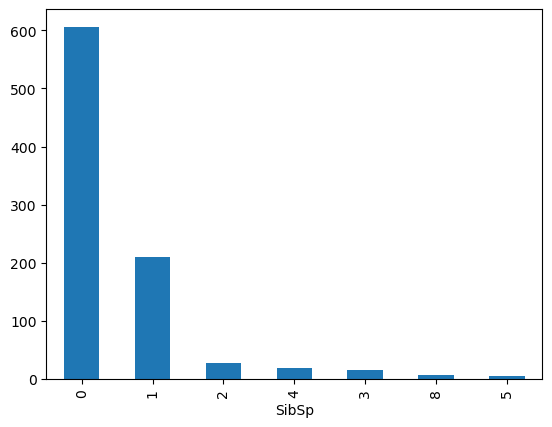

In [75]:
#number of siblings/spouses aboard the Titanic
print(df.SibSp.value_counts())
df.SibSp.value_counts().plot(kind='bar')



Text(0, 0.5, 'Survival Rate')

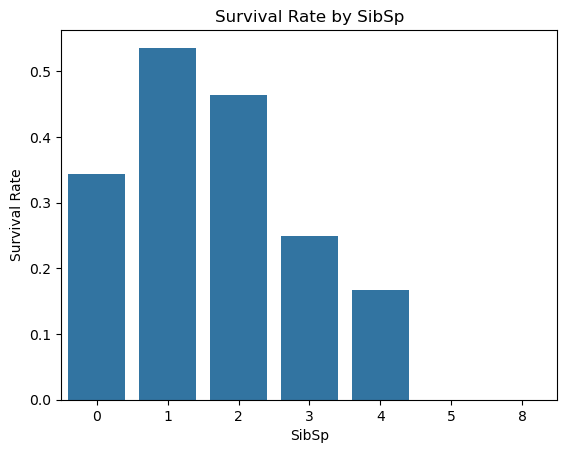

In [60]:
SibSp_survival = df.groupby('SibSp')['Survived'].mean()

#plot
sns.barplot(x=SibSp_survival.index, y=SibSp_survival.values)
plt.title('Survival Rate by SibSp')
plt.ylabel('Survival Rate')

### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


<Axes: xlabel='Parch'>

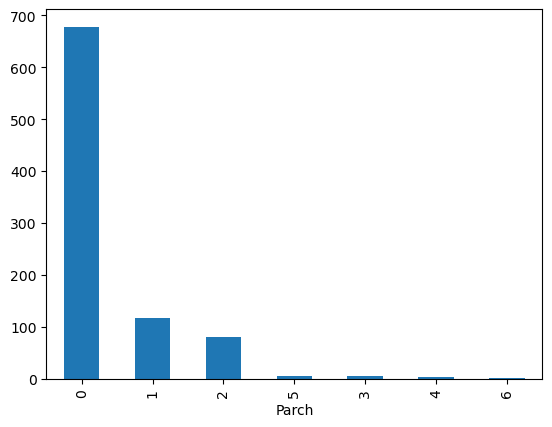

In [34]:
# number of parents/children aboard the Titanic
print(df.Parch.value_counts())
df.Parch.value_counts().plot(kind='bar')

Text(0, 0.5, 'Survival Rate')

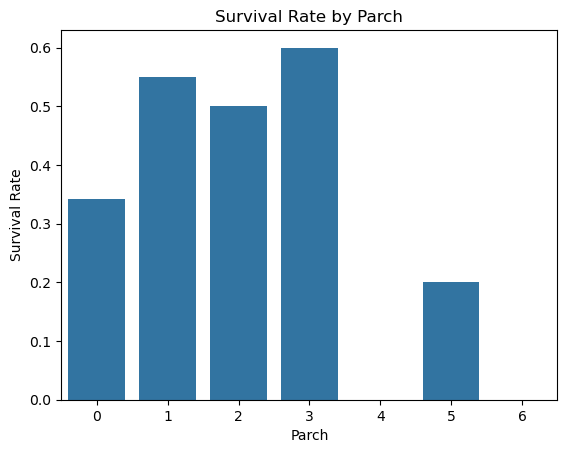

In [59]:
parch = df.groupby('Parch')['Survived'].mean()

#plot
sns.barplot(x=parch.index, y=parch.values)
plt.title('Survival Rate by Parch')
plt.ylabel('Survival Rate')

In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
# How many unique ticket values are there?
print("There are {} unique Ticket values.".format(len(df.Ticket.unique())))

# What kind of variable is Fare?
print(df.Ticket.dtype)



There are 681 unique Ticket values.
object


### Feature: Fare

Description: How much the ticket cost.

In [62]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(df.Fare.unique())))

# What kind of variable is Fare?
print(df.Fare.dtype)

There are 247 unique Fare values.
float64


Fare category frequency: FareCategory
Fare1    836
Fare2     33
fare3     17
Fare5      3
Fare4      0
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_27548\1994197690.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_cate_survival = df.groupby('FareCategory')['Survived'].mean()


Text(0, 0.5, 'Survival Rate')

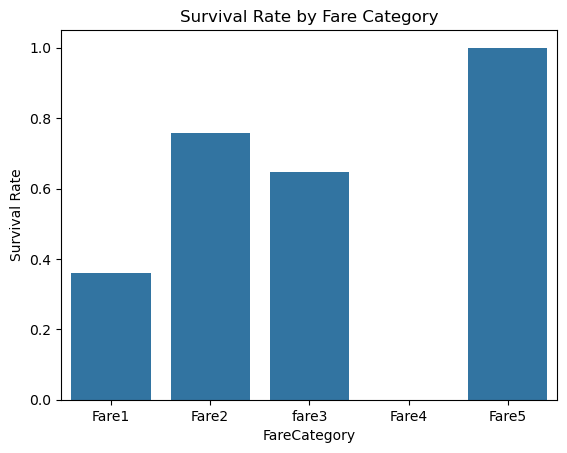

In [71]:
df['FareCategory'] =  pd.cut(df['Fare'], bins=5, labels=['Fare1', 'Fare2', 'fare3', 'Fare4', 'Fare5']) # discretised 
fare_cate_survival = df.groupby('FareCategory')['Survived'].mean()
print('Fare category frequency:', df.FareCategory.value_counts())


#plot
sns.barplot(x=fare_cate_survival.index, y=fare_cate_survival.values, )
plt.title('Survival Rate by Fare Category')
plt.ylabel('Survival Rate')

### Feature: Cabin

Description: The cabin number for where the passenger was staying.    

In [37]:
# How many unique cabin numbers are there?
print("There are {} unique Cabin values.".format(len(df.Cabin.unique())))

# What kind of variable is Fare?
print(df.Cabin.dtype)

# How many missing values does Cabin have?
print('There are {} missing values '.format(df.Cabin.isnull().sum()))


There are 148 unique Cabin values.
object
There are 687 missing values 


### Feature: Name
    
Description: The name of the passenger.

In [38]:

# How many unique name are there?
print("There are {} unique Name values.".format(len(df.Name.unique())))

# What kind of variable is Name?
print(df.Name.dtype)


There are 891 unique Name values.
object


### Feature: Age

Description: The age of the passenger.

The average age is:  29.64209269662921
The median age is:  28.0
The most occuring age is:  0    24.0
Name: Age, dtype: float64


<Axes: >

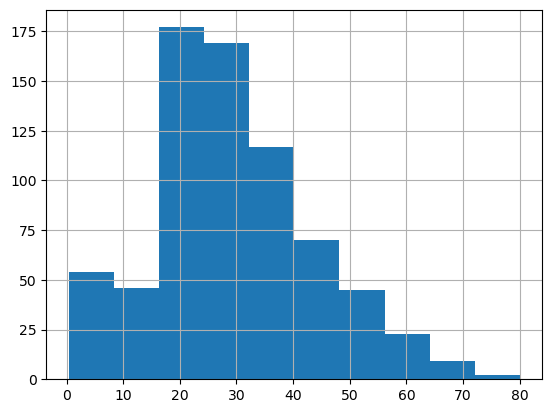

In [49]:
print('The average age is: ', df.Age.mean())
print('The median age is: ', df.Age.median())
print('The most occuring age is: ',df.Age.mode())

df.Age.hist()

In [53]:
# How many missing values does AGE  have?
print('There are {} missing values '.format(df.Age.isnull().sum()))
# replacing the missing values in 'Age' column with median age of their respective 'Sex'
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))
# How many missing values does AGE have after fixing the missing values?
print('There are {} missing values '.format(df.Age.isnull().sum()))

There are 0 missing values 
There are 0 missing values 


<Axes: >

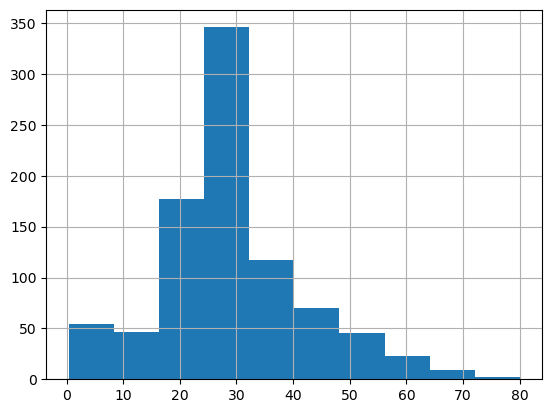

In [54]:
# After fixing Missing values
df.Age.hist()

C:\Users\USER\AppData\Local\Temp\ipykernel_27548\3588567641.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Adult         535
Middle-Age    194
Teen           70
child          69
Aged           21
Name: count, dtype: int64


Text(0, 0.5, 'Survival Rate')

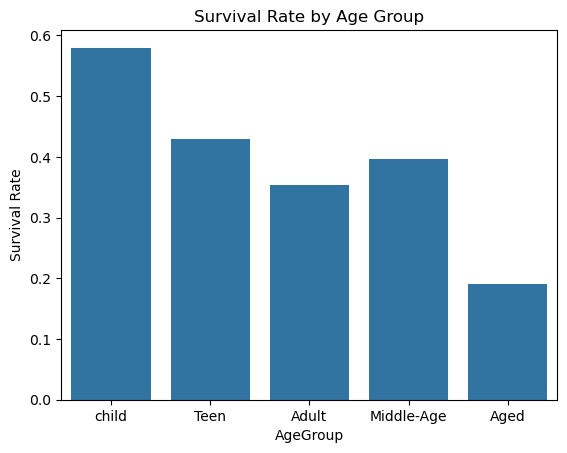

In [68]:
#survival rate by age
#Create a new feature age column
df['AgeGroup'] = pd.cut(df.Age, bins=[0, 12,18, 35, 60, 80, ], labels=['child', 'Teen', 'Adult', 'Middle-Age', 'Aged'])
age_group_survival = df.groupby('AgeGroup')['Survived'].mean()
print(df.AgeGroup.value_counts())

#plot
sns.barplot(x=age_group_survival.index, y=age_group_survival.values, )
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Fare1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle-Age,Fare1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Fare1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Fare1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Fare1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   889 non-null    int64   
 1   Survived      889 non-null    int64   
 2   Pclass        889 non-null    int64   
 3   Name          889 non-null    object  
 4   Sex           889 non-null    object  
 5   Age           889 non-null    float64 
 6   SibSp         889 non-null    int64   
 7   Parch         889 non-null    int64   
 8   Ticket        889 non-null    object  
 9   Fare          889 non-null    float64 
 10  Cabin         202 non-null    object  
 11  Embarked      889 non-null    object  
 12  AgeGroup      889 non-null    category
 13  FareCategory  889 non-null    category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [80]:
# separating dataframes
df_cate = pd.DataFrame() # for categorical
df_num= pd.DataFrame() # for numerical


In [86]:
# num
df_num["Age"] = df['Age']
df_num["Fare"] = df['Fare']
df_num["Parch"] = df['Parch']
df_num["SibSp"] = df['SibSp']
df_num["Pclass"] = df['Pclass']
df_num["Survived"] = df['Survived']

#cate
df_cate["AgeGroup"] = df['AgeGroup']
df_cate["Sex"] = df['Sex']
df_cate["Embarked"] = df['Embarked']
df_cate["FareCategory"] = df['FareCategory']

In [87]:
df_num.head()

,Age,Fare,Parch,SibSp,Pclass,Survived
0,22.0,7.2500,0,1,3,0
1,38.0,71.2833,0,1,1,1
2,26.0,7.9250,0,0,3,1
3,35.0,53.1000,0,1,1,1
4,35.0,8.0500,0,0,3,0


In [88]:
df_cate.head()

,AgeGroup,Sex,Embarked,FareCategory
0,Adult,male,S,Fare1
1,Middle-Age,female,C,Fare1
2,Adult,female,S,Fare1
3,Adult,female,S,Fare1
4,Adult,male,S,Fare1


In [89]:
df_num.isnull().sum().sort_values(ascending = False)

Age         0
Fare        0
Parch       0
SibSp       0
Pclass      0
Survived    0
dtype: int64

In [90]:
df_cate.isnull().sum().sort_values(ascending = False)

AgeGroup        0
Sex             0
Embarked        0
FareCategory    0
dtype: int64

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Survived', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>,
        <Axes: xlabel='Parch', ylabel='Fare'>,
        <Axes: xlabel='SibSp', ylabel='Fare'>,
        <Axes: xlabel='Pclass', ylabel='Fare'>,
        <Axes: xlabel='Survived', ylabel='Fare'>],
       [<Axes: xlabel='Age', ylabel='Parch'>,
        <Axes: xlabel='Fare', ylabel='Parch'>,
        <Axes: xlabel='Parch', ylabel='Parch'>,
        <Axes: xlabel='SibSp', ylabel='Parch'>,
        <Axes: xlabel='Pclass', ylabel='Parch'>,
        <Axes: xlabel='Survived', ylabel='Parch'>],
       [<Axes: xlabel='Age', ylabel='SibSp'>,
        <Axes: xlabel='Fare', ylabel='SibSp'>,
        <Axes: xlabel='Parch', ylabel='SibSp'>,
       

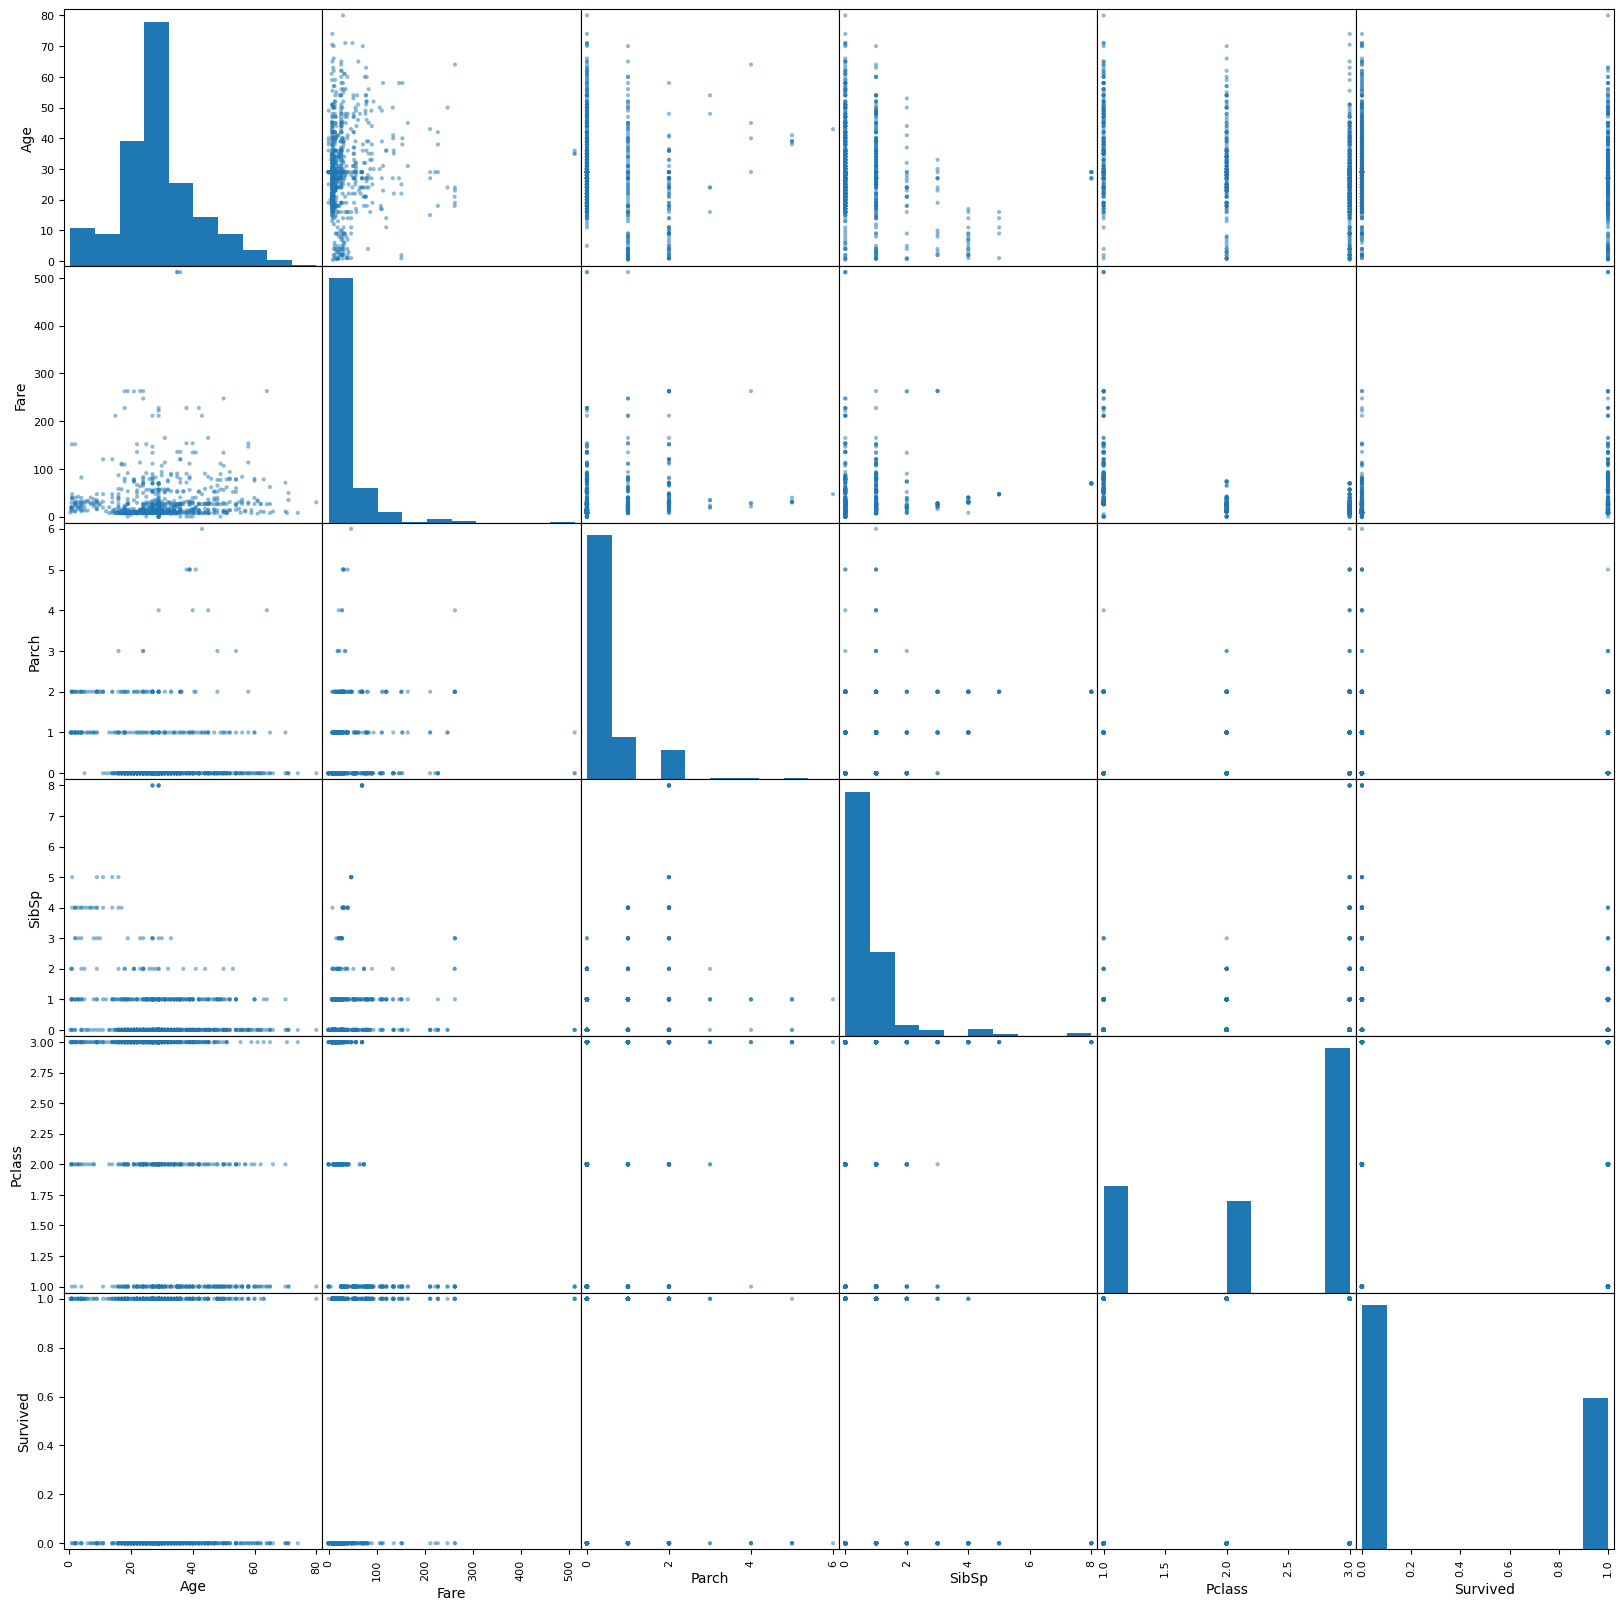

In [91]:
# scatter plot matrix
scatter_matrix(df_num, figsize=(20,20))

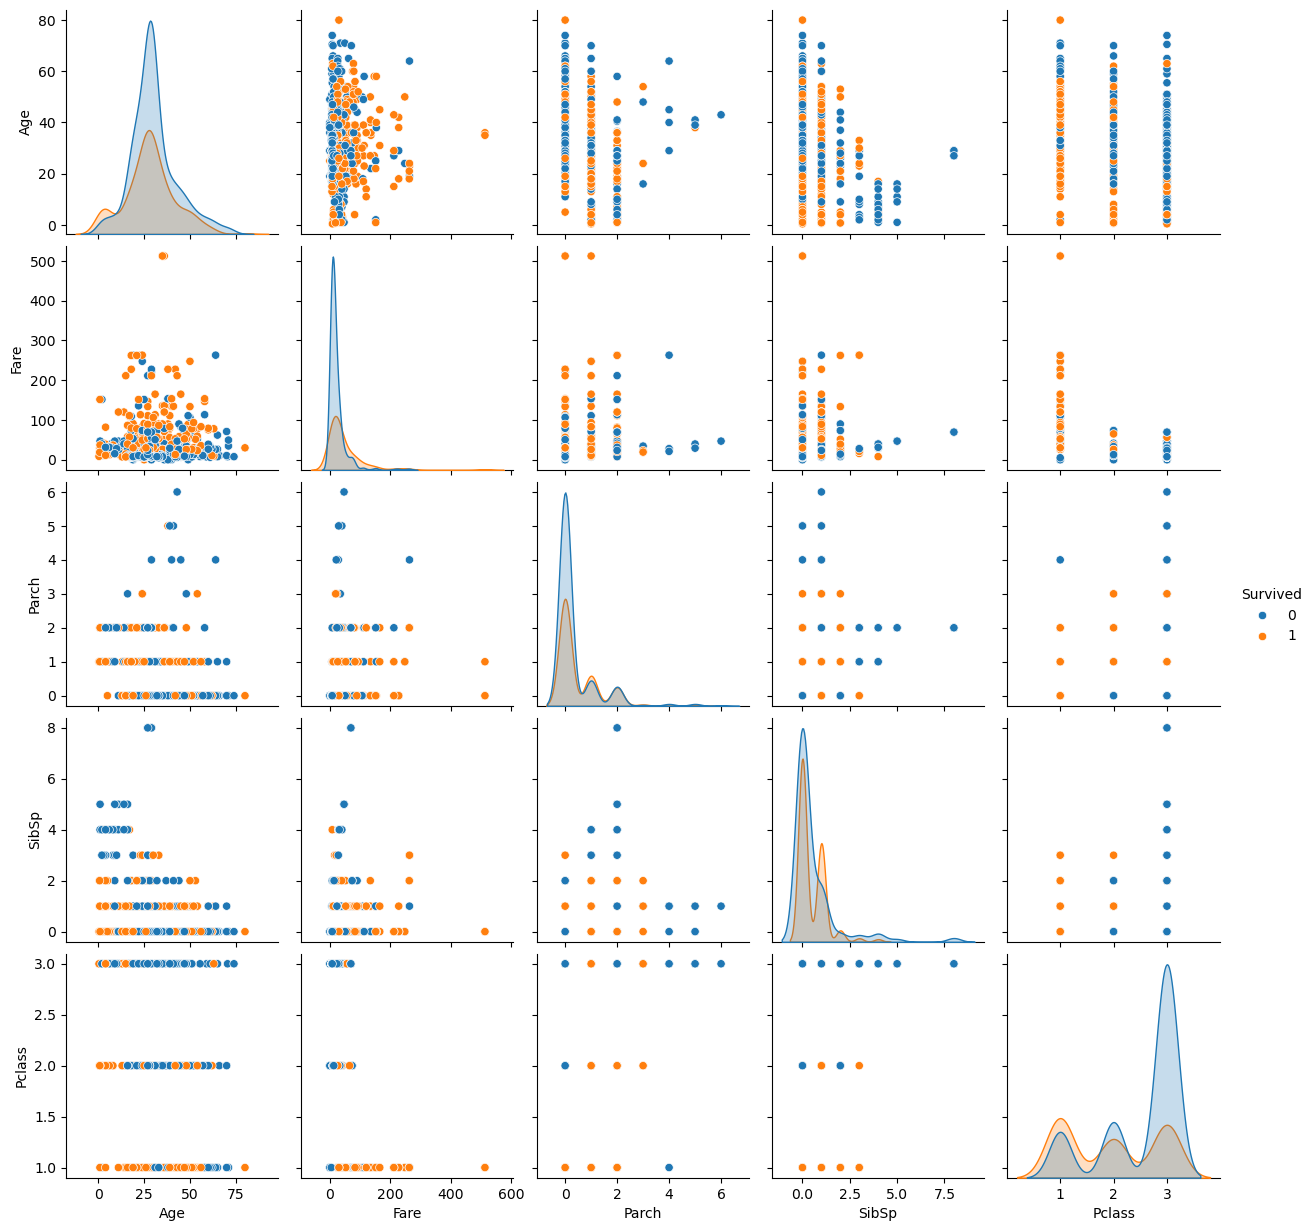

In [92]:
# pairplot
sns.pairplot(data=df_num, hue='Survived')

In [93]:
#method 2
corr_matrix = df_num.select_dtypes(include='number').corr()
corr_matrix

,Age,Fare,Parch,SibSp,Pclass,Survived
Age,1.000000,0.091178,-0.175058,-0.235637,-0.334672,-0.078236
Fare,0.091178,1.000000,0.217532,0.160887,-0.548193,0.255290
Parch,-0.175058,0.217532,1.000000,0.414542,0.016824,0.083151
SibSp,-0.235637,0.160887,0.414542,1.000000,0.081656,-0.034040
Pclass,-0.334672,-0.548193,0.016824,0.081656,1.000000,-0.335549
Survived,-0.078236,0.255290,0.083151,-0.034040,-0.335549,1.000000


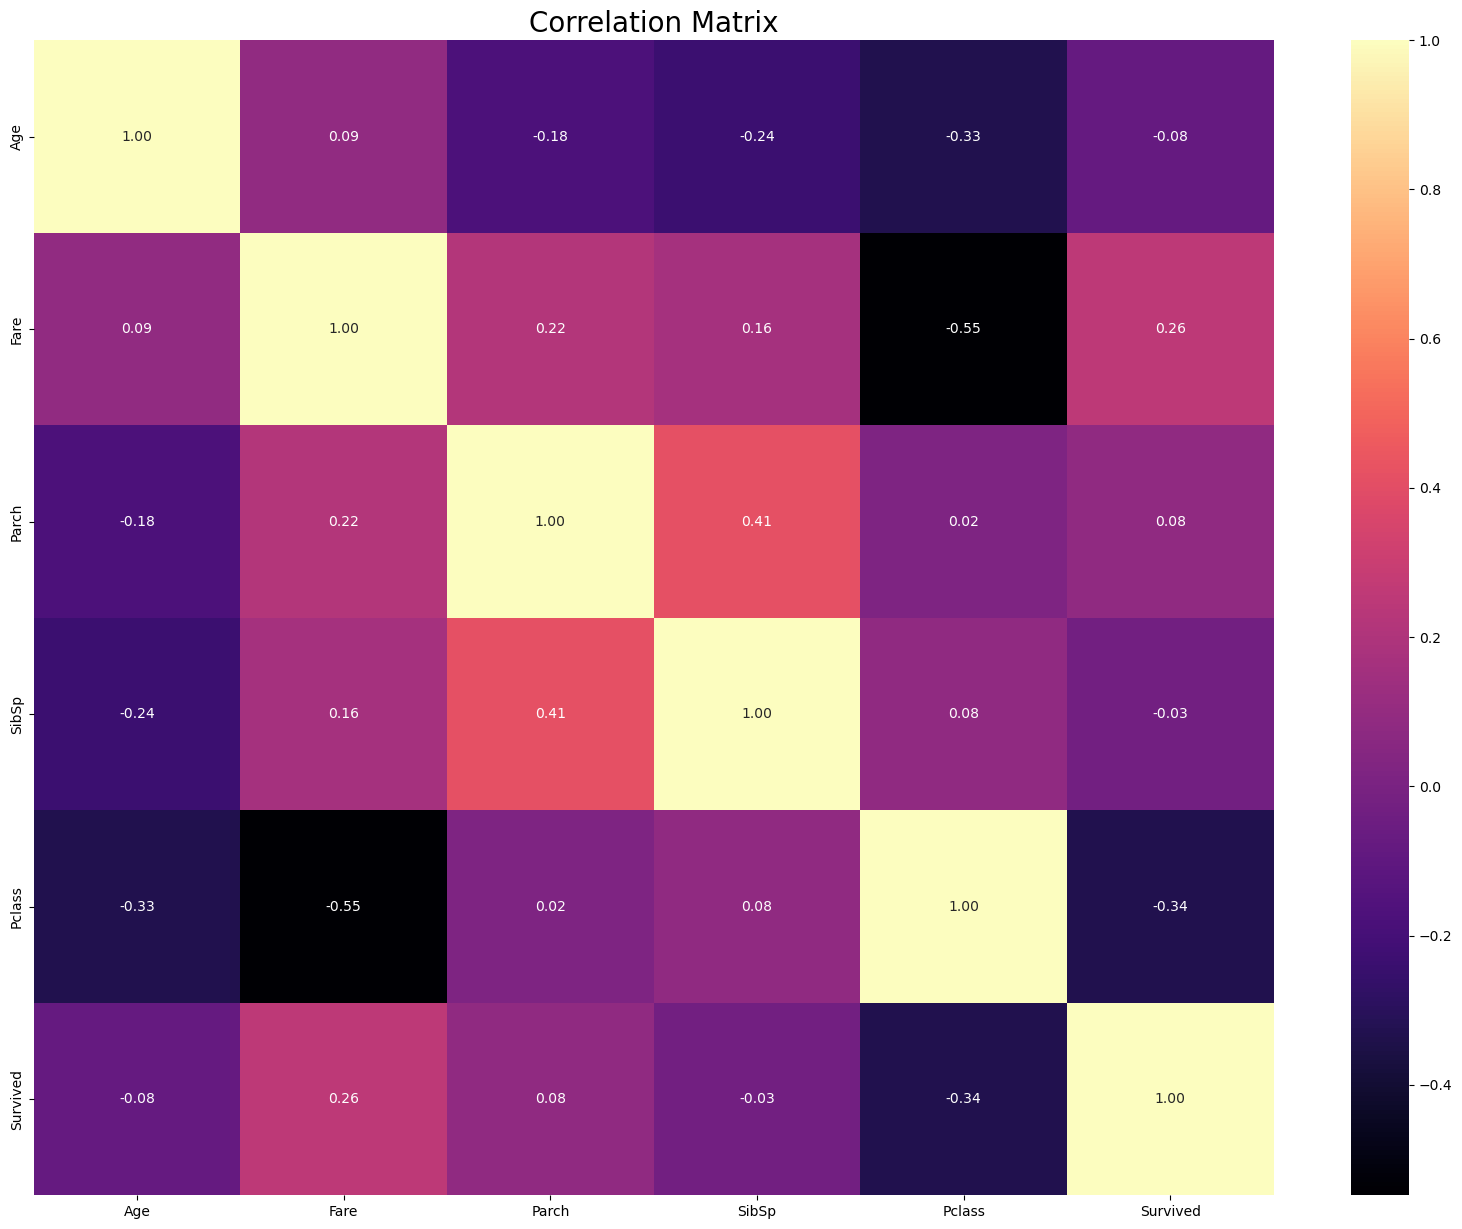

In [94]:
f, ax = plt.subplots(figsize=[20,15])
ax = sns.heatmap(corr_matrix, fmt='.2f', annot=True, cmap='magma')
ax.set_title('Correlation Matrix', fontsize=20)
plt.show()

<Axes: >

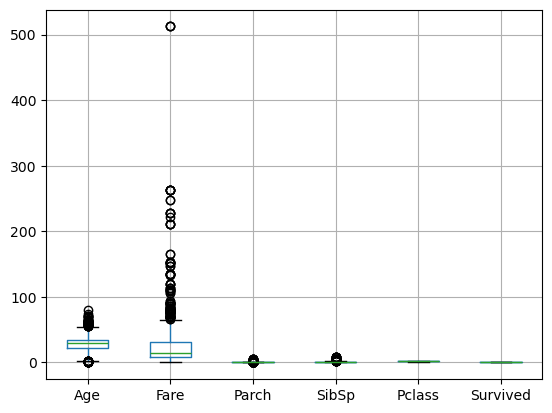

In [95]:
df_num.boxplot()

<Axes: xlabel='Age'>

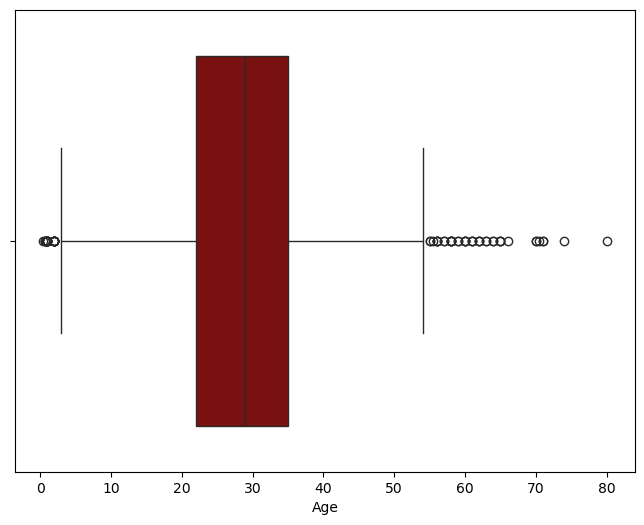

In [96]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_num.Age, color='darkred')

In [103]:
#Fixing Age Outliers
Q1 = df_num.Age.quantile(0.25)
Q3 = df_num.Age.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df_num.loc[df_num['Age'] >upper, 'Age'] = upper
df_num.loc[df_num['Age'] < lower, 'Age'] = lower

In [104]:
#Fixing Parch Outliers
Q1 = df_num.Parch.quantile(0.25)
Q3 = df_num.Parch.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df_num.loc[df_num['Parch'] >upper, 'Parch'] = upper
df_num.loc[df_num['Parch'] < lower, 'Parch'] = lower

In [105]:
# Fixing Fare Outliers
Q1 = df_num.Fare.quantile(0.25)
Q3 = df_num.Fare.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df_num.loc[df_num['Fare'] >upper, 'Fare'] = upper
df_num.loc[df_num['Fare'] < lower, 'Fare'] = lower

In [107]:
# Fixing SibSp Outliers
Q1 = df_num.SibSp.quantile(0.25)
Q3 = df_num.SibSp.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df_num.loc[df_num['SibSp'] >upper, 'SibSp'] = upper
df_num.loc[df_num['SibSp'] < lower, 'SibSp'] = lower

C:\Users\USER\AppData\Local\Temp\ipykernel_27548\4035017027.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_num.loc[df_num['SibSp'] >upper, 'SibSp'] = upper


<Axes: >

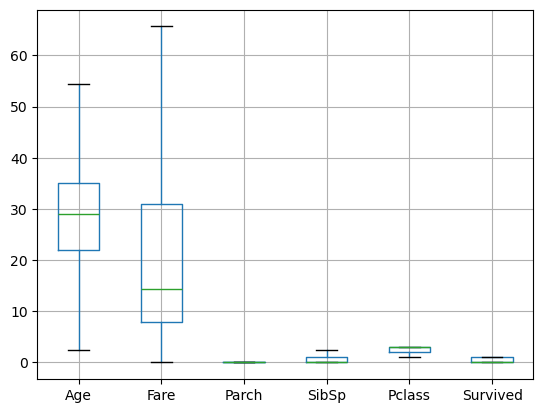

In [108]:
df_num.boxplot()

In [111]:
print(df_cate.columns)
print(df_num.columns)


Index(['AgeGroup', 'Sex', 'Embarked', 'FareCategory'], dtype='object')
Index(['Age', 'Fare', 'Parch', 'SibSp', 'Pclass', 'Survived'], dtype='object')


In [127]:
# # One hot encode the categorical columns
# df_one_encoded = pd.get_dummies(df_cate, columns=['AgeGroup', 'Sex', 'Embarked'], dtype=int )
# df_one_encoded.head(10)

# # Label Encode Pclass
# FareCategory, Pclass

# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_cate['Embarked'], 
                                     prefix='embarked', dtype=int)

df_age_group_one_hot = pd.get_dummies(df_cate['AgeGroup'], 
                                   prefix='age_group', dtype=int)

df_fare_category_one_hot = pd.get_dummies(df_cate['FareCategory'], 
                                   prefix='fare_category', dtype=int)


# # Label Encode 
label_encoder = LabelEncoder()

#for pclass
df_num['Pclass_encoded'] = label_encoder.fit_transform(df_num['Pclass'])
#for Sex  --> Sex is a binary categorical feature so label
df_cate['Sex_encoded'] = label_encoder.fit_transform(df_cate['Sex'])

In [128]:
df_num.head(
    
)

,Age,Fare,Parch,SibSp,Pclass,Survived,Pclass_encoded
0,22.0,7.2500,0,1.0,3,0,2
1,38.0,65.6563,0,1.0,1,1,0
2,26.0,7.9250,0,0.0,3,1,2
3,35.0,53.1000,0,1.0,1,1,0
4,35.0,8.0500,0,0.0,3,0,2


In [129]:
df_cate.head()

,AgeGroup,Sex,Embarked,FareCategory,Sex_encoded
0,Adult,male,S,Fare1,1
1,Middle-Age,female,C,Fare1,0
2,Adult,female,S,Fare1,0
3,Adult,female,S,Fare1,0
4,Adult,male,S,Fare1,1


In [130]:
concat_df = pd.DataFrame() # for numerical

In [131]:
print(df_cate.columns)
print(df_num.columns)

Index(['AgeGroup', 'Sex', 'Embarked', 'FareCategory', 'Sex_encoded'], dtype='object')
Index(['Age', 'Fare', 'Parch', 'SibSp', 'Pclass', 'Survived',
       'Pclass_encoded'],
      dtype='object')


In [132]:
# Combine all dataframes including the one hot encoded columns  and label into one dataframe
concat_df = pd.concat([df_num, df_cate,
                        df_embarked_one_hot, df_fare_category_one_hot,
                        df_age_group_one_hot], axis=1)



In [133]:
concat_df.head()

,Age,Fare,Parch,SibSp,Pclass,Survived,Pclass_encoded,AgeGroup,Sex,Embarked,...,fare_category_Fare1,fare_category_Fare2,fare_category_fare3,fare_category_Fare4,fare_category_Fare5,age_group_child,age_group_Teen,age_group_Adult,age_group_Middle-Age,age_group_Aged
0,22.0,7.2500,0,1.0,3,0,2,Adult,male,S,...,1,0,0,0,0,0,0,1,0,0
1,38.0,65.6563,0,1.0,1,1,0,Middle-Age,female,C,...,1,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,0.0,3,1,2,Adult,female,S,...,1,0,0,0,0,0,0,1,0,0
3,35.0,53.1000,0,1.0,1,1,0,Adult,female,S,...,1,0,0,0,0,0,0,1,0,0
4,35.0,8.0500,0,0.0,3,0,2,Adult,male,S,...,1,0,0,0,0,0,0,1,0,0


In [134]:
concat_df.columns

Index(['Age', 'Fare', 'Parch', 'SibSp', 'Pclass', 'Survived', 'Pclass_encoded',
       'AgeGroup', 'Sex', 'Embarked', 'FareCategory', 'Sex_encoded',
       'embarked_C', 'embarked_Q', 'embarked_S', 'fare_category_Fare1',
       'fare_category_Fare2', 'fare_category_fare3', 'fare_category_Fare4',
       'fare_category_Fare5', 'age_group_child', 'age_group_Teen',
       'age_group_Adult', 'age_group_Middle-Age', 'age_group_Aged'],
      dtype='object')

In [135]:
# Drop the original categorical columns (because now they've been one hot encoded)
concat_df = concat_df.drop(['Pclass', 'Sex', 'Embarked', 'FareCategory', 'AgeGroup'], axis=1)

In [136]:
concat_df.head()

,Age,Fare,Parch,SibSp,Survived,Pclass_encoded,Sex_encoded,embarked_C,embarked_Q,embarked_S,fare_category_Fare1,fare_category_Fare2,fare_category_fare3,fare_category_Fare4,fare_category_Fare5,age_group_child,age_group_Teen,age_group_Adult,age_group_Middle-Age,age_group_Aged
0,22.0,7.2500,0,1.0,0,2,1,0,0,1,1,0,0,0,0,0,0,1,0,0
1,38.0,65.6563,0,1.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,0.0,1,2,0,0,0,1,1,0,0,0,0,0,0,1,0,0
3,35.0,53.1000,0,1.0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,35.0,8.0500,0,0.0,0,2,1,0,0,1,1,0,0,0,0,0,0,1,0,0


In [137]:
target_feature = concat_df.Survived
concat_df = concat_df.drop('Survived', axis=1)

In [143]:
# Scaling data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(concat_df)
scaled_df = pd.DataFrame(scaled_features, columns=concat_df.columns)

In [144]:
scaled_df.head()

,Age,Fare,Parch,SibSp,Pclass_encoded,Sex_encoded,embarked_C,embarked_Q,embarked_S,fare_category_Fare1,fare_category_Fare2,fare_category_fare3,fare_category_Fare4,fare_category_Fare5,age_group_child,age_group_Teen,age_group_Adult,age_group_Middle-Age,age_group_Aged
0,-0.587773,-0.818784,0.0,0.808286,0.825209,0.735342,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
1,0.740447,2.043778,0.0,0.808286,-1.572211,-1.359911,2.071634,-0.307941,-1.621287,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,-1.229349,1.892743,-0.155543
2,-0.255718,-0.785701,0.0,-0.603436,0.825209,-1.359911,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
3,0.491406,1.428379,0.0,0.808286,-1.572211,-1.359911,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
4,0.491406,-0.779575,0.0,-0.603436,0.825209,0.735342,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543


In [145]:
X = scaled_df
Y = target_feature

In [146]:
# modelling

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [151]:
print(X_train.shape)
X_train.head()

(711, 19)


,Age,Fare,Parch,SibSp,Pclass_encoded,Sex_encoded,embarked_C,embarked_Q,embarked_S,fare_category_Fare1,fare_category_Fare2,fare_category_fare3,fare_category_Fare4,fare_category_Fare5,age_group_child,age_group_Teen,age_group_Adult,age_group_Middle-Age,age_group_Aged
707,-0.587773,2.043778,0.0,-0.603436,-1.572211,-1.359911,-0.482711,-0.307941,0.616794,-3.971597,5.093073,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
239,-0.172704,-0.465697,0.0,0.808286,0.825209,-1.359911,2.071634,-0.307941,-1.621287,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
381,0.242365,-0.785701,0.0,-0.603436,0.825209,0.735342,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
791,-0.172704,2.043778,0.0,2.925870,0.825209,-1.359911,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
682,-1.251883,1.124509,0.0,2.925870,0.825209,0.735342,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,3.420526,-1.229349,-0.528334,-0.155543


In [152]:
print(Y_train.shape)
Y_train.head()

(711,)


708    1
240    0
382    0
792    0
683    0
Name: Survived, dtype: int64

In [153]:
print(X_val.shape)
X_val.head()

(178, 19)


,Age,Fare,Parch,SibSp,Pclass_encoded,Sex_encoded,embarked_C,embarked_Q,embarked_S,fare_category_Fare1,fare_category_Fare2,fare_category_fare3,fare_category_Fare4,fare_category_Fare5,age_group_child,age_group_Teen,age_group_Adult,age_group_Middle-Age,age_group_Aged
280,-0.089690,-0.789171,0.0,-0.603436,0.825209,0.735342,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
434,-1.251883,2.043778,0.0,0.808286,-1.572211,-1.359911,-0.482711,-0.307941,0.616794,-3.971597,5.093073,-0.139626,0.0,-0.058189,-0.29008,3.420526,-1.229349,-0.528334,-0.155543
39,-1.251883,-0.623146,0.0,0.808286,0.825209,-1.359911,2.071634,-0.307941,-1.621287,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,3.420526,-1.229349,-0.528334,-0.155543
417,0.076337,-0.536969,0.0,-0.603436,-0.373501,0.735342,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
584,-0.919828,2.043778,0.0,-0.603436,-1.572211,-1.359911,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,3.420526,-1.229349,-0.528334,-0.155543


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42, max_iter=500),
    "CatBoost": CatBoostClassifier(iterations=500, random_seed=42, verbose=0),
    "LightGBM": LGBMClassifier(random_state=42)
}

### Logistic Regression

In [186]:
logreg = LogisticRegression(random_state=42)
# Train the model on the entire training data
logreg.fit(X_train, Y_train)
# Calculate training accuracy (accuracy on the entire training data)
acc_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
print('logreg train data accuracy score:', acc_logreg)

# Perform cross-validation to get predictions for each data point
logreg_pred = cross_val_predict(logreg, X_train, Y_train, cv=10, n_jobs=-1)

 # Calculate cross-validated accuracy by comparing predictions to actual labels
acc_cv_logreg = round(accuracy_score(Y_train, logreg_pred) * 100, 2)
print('logreg cross val  data accuracy score:', acc_cv)
    


logreg train data accuracy score: 80.59
logreg cross val  data accuracy score: 78.34


### K-Nearest Neighbours

In [185]:
knn = KNeighborsClassifier()
# Train the model on the entire training data
knn.fit(X_train, Y_train)
# Calculate training accuracy (accuracy on the entire training data)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print('knn train data accuracy score:', acc_knn)

# Perform cross-validation to get predictions for each data point
knn_pred = cross_val_predict(knn, X_train, Y_train, cv=10, n_jobs=-1)

 # Calculate cross-validated accuracy by comparing predictions to actual labels
acc_cv_knn = round(accuracy_score(Y_train, knn_pred) * 100, 2)
print('knn cross val  data accuracy score:', acc_cv)
    

knn train data accuracy score: 85.51
knn cross val  data accuracy score: 78.34


### Gaussian Naive Bayes

In [184]:
gnb = GaussianNB()
# Train the model on the entire training data
gnb.fit(X_train, Y_train)
# Calculate training accuracy (accuracy on the entire training data)
acc_gnb = round(gnb.score(X_train, Y_train) * 100, 2)
print('gnb train data accuracy score:', acc_gnb)

# Perform cross-validation to get predictions for each data point
gnb_pred = cross_val_predict(gnb, X_train, Y_train, cv=10, n_jobs=-1)

 # Calculate cross-validated accuracy by comparing predictions to actual labels
acc_cv_gnb = round(accuracy_score(Y_train, gnb_pred) * 100, 2)
print('gnb cross val  data accuracy score:', acc_cv)

gnb train data accuracy score: 64.7
gnb cross val  data accuracy score: 78.34


### Support Vector Machines (SVC)

In [183]:
svc = SVC()
# Train the model on the entire training data
svc.fit(X_train, Y_train)
# Calculate training accuracy (accuracy on the entire training data)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print('svc train data accuracy score:', acc_svc)

# Perform cross-validation to get predictions for each data point
svc_pred = cross_val_predict(svc, X_train, Y_train, cv=10, n_jobs=-1)

 # Calculate cross-validated accuracy by comparing predictions to actual labels
acc_cv_svc = round(accuracy_score(Y_train, svc_pred) * 100, 2)
print('svc cross val  data accuracy score:', acc_cv)

svc train data accuracy score: 83.97
svc cross val  data accuracy score: 78.34


### Decision Tree Classifier

In [182]:
dtc = DecisionTreeClassifier()
# Train the model on the entire training data
dtc.fit(X_train, Y_train)
# Calculate training accuracy (accuracy on the entire training data)
acc_dtc = round(dtc.score(X_train, Y_train) * 100, 2)
print('dtc train data accuracy score:', acc_svc)

# Perform cross-validation to get predictions for each data point
dtc_pred = cross_val_predict(dtc, X_train, Y_train, cv=10, n_jobs=-1)

 # Calculate cross-validated accuracy by comparing predictions to actual labels
acc_cv_dtc = round(accuracy_score(Y_train, svc_pred) * 100, 2)
print('dtc cross val  data accuracy score:', acc_cv)

dtc train data accuracy score: 89.59
dtc cross val  data accuracy score: 78.34


### Gradient Boost Trees

In [181]:
gbc = GradientBoostingClassifier()
# Train the model on the entire training data
gbc.fit(X_train, Y_train)
# Calculate training accuracy (accuracy on the entire training data)
acc_svc = round(gbc.score(X_train, Y_train) * 100, 2)
print('gbc train data accuracy score:', acc_svc)

# Perform cross-validation to get predictions for each data point
gbc_pred = cross_val_predict(gbc, X_train, Y_train, cv=10, n_jobs=-1)

 # Calculate cross-validated accuracy by comparing predictions to actual labels
acc_cv_gbc = round(accuracy_score(Y_train, svc_pred) * 100, 2)
print('gbc cross val  data accuracy score:', acc_cv)

gbc train data accuracy score: 89.59
gbc cross val  data accuracy score: 78.34


In [187]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
             ' SVC',  'Decision Tree', 'Gradient Boosting Trees'
              ],
    'Score': [
        acc_cv_knn, 
        acc_cv_logreg,      
        acc_cv_gnb, 
        acc_cv_svc, 
        acc_cv_dtc,
        acc_cv_gbc,
      
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
3,SVC,81.72
0,KNN,81.01
1,Logistic Regression,79.47
4,Decision Tree,78.34
5,Gradient Boosting Trees,78.34
2,Naive Bayes,64.56


In [198]:
#Hyper parameter tuning
# from sklearn.model_selection import GridSearchCV


# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 0.1, 0.01, 0.001]
}

# Initialize the SVC model
svc = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_svc = grid_search.best_estimator_ # Retrieved best SVC model after tuning

# Display best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best estimator found: ", grid_search.best_estimator_)


Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best estimator found:  SVC(C=10)


In [199]:
# Step 1: Retrieve and retrain the best SVC model on the full training set

best_svc.fit(X_train, Y_train)

# Step 2: Validate on validation set
val_predictions_svc = best_svc.predict(X_val)
val_accuracy_svc = round(accuracy_score(Y_val, val_predictions_svc) * 100, 2)
print(f"SVC Validation Accuracy: {val_accuracy_svc}%")

# # Step 3: Test on testing set (if available)
# test_predictions_svc = best_svc.predict(X_test)
# test_accuracy_svc = round(accuracy_score(y_test, test_predictions_svc) * 100, 2)
# print(f"SVC Test Accuracy: {test_accuracy_svc}%")


SVC Validation Accuracy: 80.9%


In [202]:
hyper_models = pd.DataFrame({
    'Model': ['KNN',  ' SVC' ],
    'Score': [
        val_accuracy_knn, 
        val_accuracy_svc,      
    
      
    ]})
print('---Hyperparameter tunning Accuracy Scores---')
hyper_models.sort_values(by='Score', ascending=False)

---Hyperparameter tunning Accuracy Scores---


,Model,Score
1,SVC,80.90
0,KNN,80.34


KNN Validation Accuracy: 80.34%


### Submission

In [229]:
test_df = pd.read_csv('data/test.csv')

In [230]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [231]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [232]:
#fixing missing values
#Age
# How many missing values does AGE  have?
print('There are {} missing values '.format(test_df.Age.isnull().sum()))
# replacing the missing values in 'Age' column with median age of their respective 'Sex'
test_df['Age'] = test_df['Age'].fillna(test_df.groupby('Sex')['Age'].transform('median'))
# How many missing values does AGE have after fixing the missing values?
print('There are {} missing values '.format(test_df.Age.isnull().sum()))

There are 86 missing values 
There are 0 missing values 


In [233]:
# Fare and Embarked
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27548\3436420402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_27548\3436420402.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [234]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Axes: >

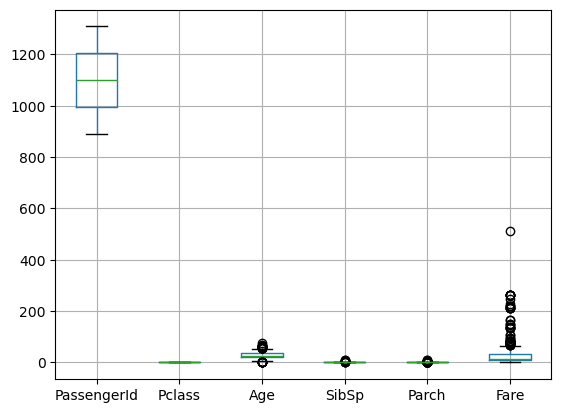

In [235]:
test_df.boxplot()

In [236]:
# fixing Outliers
#Fixing Age Outliers
Q1 = test_df.Age.quantile(0.25)
Q3 = test_df.Age.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
test_df.loc[test_df['Age'] >upper, 'Age'] = upper
test_df.loc[test_df['Age'] < lower, 'Age'] = lower

In [237]:
#Fixing Parch Outliers
Q1 = test_df.Parch.quantile(0.25)
Q3 = test_df.Parch.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
test_df.loc[test_df['Parch'] >upper, 'Parch'] = upper
test_df.loc[test_df['Parch'] < lower, 'Parch'] = lower

In [238]:
# Fixing Fare Outliers
Q1 = test_df.Fare.quantile(0.25)
Q3 = test_df.Fare.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
test_df.loc[test_df['Fare'] >upper, 'Fare'] = upper
test_df.loc[test_df['Fare'] < lower, 'Fare'] = lower

In [239]:
# Fixing SibSp Outliers
Q1 = test_df.SibSp.quantile(0.25)
Q3 = test_df.SibSp.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
test_df.loc[test_df['SibSp'] >upper, 'SibSp'] = upper
test_df.loc[test_df['SibSp'] < lower, 'SibSp'] = lower

C:\Users\USER\AppData\Local\Temp\ipykernel_27548\2134407139.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df.loc[test_df['SibSp'] >upper, 'SibSp'] = upper


<Axes: >

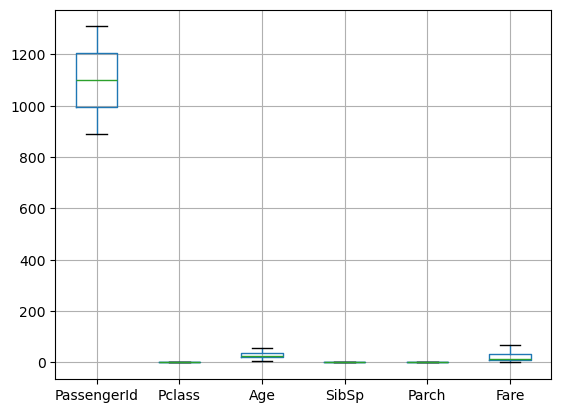

In [240]:
test_df.boxplot()

In [241]:
# feature engineering
#Age
test_df['AgeGroup'] = pd.cut(test_df.Age, bins=[0, 12,18, 35, 60, 80, ], labels=['child', 'Teen', 'Adult', 'Middle-Age', 'Aged'])
#Fare
test_df['FareCategory'] =  pd.cut(test_df['Fare'], bins=5, labels=['Fare1', 'Fare2', 'fare3', 'Fare4', 'Fare5']) # discretised 

In [242]:
# # One hot encode the categorical columns
# df_one_encoded = pd.get_dummies(df_cate, columns=['AgeGroup', 'Sex', 'Embarked'], dtype=int )
# df_one_encoded.head(10)

# # Label Encode Pclass
# FareCategory, Pclass

# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(test_df['Embarked'], 
                                     prefix='embarked', dtype=int)

df_age_group_one_hot = pd.get_dummies(test_df['AgeGroup'], 
                                   prefix='age_group', dtype=int)

df_fare_category_one_hot = pd.get_dummies(test_df['FareCategory'], 
                                   prefix='fare_category', dtype=int)


# # Label Encode 
label_encoder = LabelEncoder()

#for pclass
test_df['Pclass_encoded'] = label_encoder.fit_transform(test_df['Pclass'])
#for Sex  --> Sex is a binary categorical feature so label
test_df['Sex_encoded'] = label_encoder.fit_transform(test_df['Sex'])

In [243]:
# Combine all dataframes including the one hot encoded columns  and label into one dataframe
concat_test_df = pd.concat([test_df,
                        df_embarked_one_hot, df_fare_category_one_hot,
                        df_age_group_one_hot], axis=1)


In [244]:
print(X.columns)
print(concat_test_df.columns)

Index(['Age', 'Fare', 'Parch', 'SibSp', 'Pclass_encoded', 'Sex_encoded',
       'embarked_C', 'embarked_Q', 'embarked_S', 'fare_category_Fare1',
       'fare_category_Fare2', 'fare_category_fare3', 'fare_category_Fare4',
       'fare_category_Fare5', 'age_group_child', 'age_group_Teen',
       'age_group_Adult', 'age_group_Middle-Age', 'age_group_Aged'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'FareCategory',
       'Pclass_encoded', 'Sex_encoded', 'embarked_C', 'embarked_Q',
       'embarked_S', 'fare_category_Fare1', 'fare_category_Fare2',
       'fare_category_fare3', 'fare_category_Fare4', 'fare_category_Fare5',
       'age_group_child', 'age_group_Teen', 'age_group_Adult',
       'age_group_Middle-Age', 'age_group_Aged'],
      dtype='object')


In [247]:
concat_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           418 non-null    int64   
 1   Pclass                418 non-null    int64   
 2   Name                  418 non-null    object  
 3   Sex                   418 non-null    object  
 4   Age                   418 non-null    float64 
 5   SibSp                 418 non-null    float64 
 6   Parch                 418 non-null    int64   
 7   Ticket                418 non-null    object  
 8   Fare                  418 non-null    float64 
 9   Cabin                 91 non-null     object  
 10  Embarked              418 non-null    object  
 11  AgeGroup              418 non-null    category
 12  FareCategory          418 non-null    category
 13  Pclass_encoded        418 non-null    int64   
 14  Sex_encoded           418 non-null    int32   
 15  embark

In [287]:
selected_df = concat_test_df.drop(columns=['PassengerId','Ticket', 'Cabin', 'Pclass', 'Name', 'Sex' , 'Embarked', 'AgeGroup', 'FareCategory'], axis=1)

In [290]:
selected_df.head()

,Age,SibSp,Parch,Fare,Pclass_encoded,Sex_encoded,embarked_C,embarked_Q,embarked_S,fare_category_Fare1,fare_category_Fare2,fare_category_fare3,fare_category_Fare4,fare_category_Fare5,age_group_child,age_group_Teen,age_group_Adult,age_group_Middle-Age,age_group_Aged
0,34.500,0.0,0,7.8292,2,1,0,1,0,1,0,0,0,0,0,0,1,0,0
1,47.000,1.0,0,7.0000,2,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,54.875,0.0,0,9.6875,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0
3,27.000,0.0,0,8.6625,2,1,0,0,1,1,0,0,0,0,0,0,1,0,0
4,22.000,1.0,0,12.2875,2,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [260]:
X.head(
    
)

,Age,Fare,Parch,SibSp,Pclass_encoded,Sex_encoded,embarked_C,embarked_Q,embarked_S,fare_category_Fare1,fare_category_Fare2,fare_category_fare3,fare_category_Fare4,fare_category_Fare5,age_group_child,age_group_Teen,age_group_Adult,age_group_Middle-Age,age_group_Aged
0,-0.587773,-0.818784,0.0,0.808286,0.825209,0.735342,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
1,0.740447,2.043778,0.0,0.808286,-1.572211,-1.359911,2.071634,-0.307941,-1.621287,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,-1.229349,1.892743,-0.155543
2,-0.255718,-0.785701,0.0,-0.603436,0.825209,-1.359911,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
3,0.491406,1.428379,0.0,0.808286,-1.572211,-1.359911,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543
4,0.491406,-0.779575,0.0,-0.603436,0.825209,0.735342,-0.482711,-0.307941,0.616794,0.251788,-0.196345,-0.139626,0.0,-0.058189,-0.29008,-0.292353,0.813439,-0.528334,-0.155543


In [289]:
print(X.shape)
print(selected_df.shape)


(889, 19)
(418, 19)


In [291]:
# Scaling data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_df)
scaled_test_df = pd.DataFrame(scaled_features, columns=selected_df.columns)

In [292]:
scaled_test_df.head()

,Age,SibSp,Parch,Fare,Pclass_encoded,Sex_encoded,embarked_C,embarked_Q,embarked_S,fare_category_Fare1,fare_category_Fare2,fare_category_fare3,fare_category_Fare4,fare_category_Fare5,age_group_child,age_group_Teen,age_group_Adult,age_group_Middle-Age,age_group_Aged
0,0.437674,-0.622272,0.0,-0.794366,0.873482,0.755929,-0.568142,2.843757,-1.350676,1.079724,-0.564457,-0.306987,-0.192927,-0.459994,-0.252217,-0.273039,0.783517,-0.579192,0.0
1,1.501076,0.949387,0.0,-0.833539,0.873482,-1.322876,-0.568142,-0.351647,0.740370,1.079724,-0.564457,-0.306987,-0.192927,-0.459994,-0.252217,-0.273039,-1.276296,1.726543,0.0
2,2.171019,-0.622272,0.0,-0.706576,-0.315819,0.755929,-0.568142,2.843757,-1.350676,1.079724,-0.564457,-0.306987,-0.192927,-0.459994,-0.252217,-0.273039,-1.276296,1.726543,0.0
3,-0.200367,-0.622272,0.0,-0.754999,0.873482,0.755929,-0.568142,-0.351647,0.740370,1.079724,-0.564457,-0.306987,-0.192927,-0.459994,-0.252217,-0.273039,0.783517,-0.579192,0.0
4,-0.625728,0.949387,0.0,-0.583747,0.873482,-1.322876,-0.568142,-0.351647,0.740370,1.079724,-0.564457,-0.306987,-0.192927,-0.459994,-0.252217,-0.273039,0.783517,-0.579192,0.0


In [294]:
# Making Prediction on the test data
# Reorder test_data columns to match train_data

X_test = scaled_test_df
X_test = X_test[X.columns]
test_predictions = best_svc.predict(X_test)

# Create a submission dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = concat_test_df['PassengerId']
submission['Survived'] = test_predictions # our model predictions on the test dataset
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [295]:
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [296]:
submission.sample(20)

,PassengerId,Survived
171,1063,0
256,1148,0
95,987,0
271,1163,0
239,1131,1
309,1201,0
260,1152,0
258,1150,1
176,1068,1
157,1049,0


In [298]:
# Are our test and submission dataframes the same length?
if len(submission) == len(X_test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [299]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('./data/svc_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
